In [2]:
import numpy as np
from scipy import stats

from cobaya.theory import Theory
from cobaya.run import run
from cobaya.log import LoggedError

from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

In [102]:
rng = np.random.default_rng(12345)
pert_order = rng.integers(low=5, high=6, size=1)

simple_coef_truth = np.array([0.1,-0.2,0.3])
poly_truth = np.polynomial.Polynomial(simple_coef_truth)
sample_std_dev = 0.05

In [95]:
n_samples = 100
sample_points = np.linspace(0,1,num=n_samples)
samples_truth = poly_truth(sample_points)
sample_noise = rng.normal(0, sample_std_dev, n_samples)
sample_observed = samples_truth+sample_noise

model_dim  =  3
model_keys =  tuple('q'+str(i) for i in range(model_dim))
model_ranges = dict((k,(-1,1)) for k in model_keys)

In [96]:
exec("def get_polynomial_vals(" + ",".join(model_keys) + "): return np.polynomial.Polynomial(["+",".join(model_keys)+"])(sample_points)")

exec("def noisy_data_logp(" + ",".join(model_keys) + "): return stats.multivariate_normal.logpdf(get_polynomial_vals(" + ",".join(model_keys) + "), mean=sample_noise, cov=sample_std_dev)")



In [97]:
likelihood_info = {'noisy_data_like': noisy_data_logp}
params_info = {k: {"prior": {"min": -1, "max": 1}} for k in model_keys}
sampler_info = {'mcmc':{'Rminus1_stop': 0.001}}
info = {'likelihood':likelihood_info,
        'params':params_info,
        'sampler':sampler_info}

In [99]:
updated_info, sampler0 = run(info)

[noisy_data_like] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {noisy_data_like: 2410.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: q0:-0.5315416, q1:0.4704848, q2:-0.07231807
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-01 00:49:52 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 120 samples accepted.
[mcmc]  - Acceptance rate: 0.045
[mcmc]  - Convergence of means: R-1 = 0.571290 after 96 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] 

[root] *WARNING* outlier fraction 0.00078125 


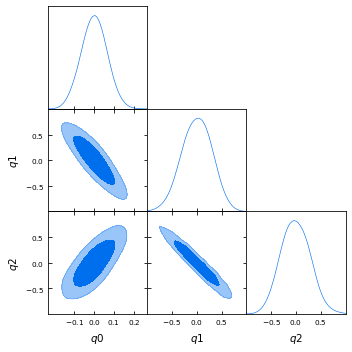

In [100]:
gdsamples0 = MCSamplesFromCobaya(updated_info, sampler0.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples0, model_keys, filled=True)

In [104]:
(gdsamples0.mean(['q0','q1','q2'])-simple_coef_truth)/simple_coef_truth

array([-0.99846649, -1.02132235, -1.03283592])

In [52]:
np.diag(1/np.sqrt(np.diag(gdsamples.cov(['q0','q1','q2']))))@gdsamples.cov(['q0','q1','q2'])@np.diag(1/np.sqrt(np.diag(gdsamples.cov(['q0','q1','q2']))))

array([[ 1.        , -0.86235379,  0.74050903],
       [-0.86235379,  1.        , -0.96758761],
       [ 0.74050903, -0.96758761,  1.        ]])

In [53]:
np.diag(1/np.sqrt(np.diag(gdsamples.cov(['q0','q1','q2']))))

array([[15.1206357 ,  0.        ,  0.        ],
       [ 0.        ,  3.26323489,  0.        ],
       [ 0.        ,  0.        ,  3.37679365]])

In [71]:
rng = np.random.default_rng(12345)
pert_min = 4
pert_max = 6
pert_order = rng.integers(low=pert_min, high=pert_max, size=1)

coefs_truth = np.zeros(pert_max)
for idx in range(3):
        coefs_truth[idx] = rng.uniform(-1,1)

coefs_truth[pert_order] = rng.uniform(-0.1,0.1)

poly_truth = np.polynomial.Polynomial(coefs_truth)
sample_std_dev = 0.01

In [74]:
n_samples = 100
sample_points = np.linspace(0,1,num=n_samples)
samples_truth = poly_truth(sample_points)
sample_noise = rng.normal(0, sample_std_dev, n_samples)
sample_observed = samples_truth+sample_noise

model_dim  =  pert_max
model_keys =  tuple('q'+str(i) for i in range(model_dim))
model_ranges = dict((k,{"min": -1, "max": 1}) for k in model_keys[:3])
model_ranges |= dict((k,{"min": -0.2, "max": 0.2}) for k in model_keys[3:])

In [75]:
exec("def get_polynomial_vals(" + ",".join(model_keys) + "): return np.polynomial.Polynomial(["+",".join(model_keys)+"])(sample_points)")

exec("def noisy_data_logp(" + ",".join(model_keys) + "): return stats.multivariate_normal.logpdf(get_polynomial_vals(" + ",".join(model_keys) + "), mean=sample_noise, cov=sample_std_dev)")

likelihood_info = {'noisy_data_like': noisy_data_logp}
params_info = {k: {"prior": model_ranges[k]} for k in model_keys}
sampler_info = {'mcmc':{'Rminus1_stop': 0.01}}
info = {'likelihood':likelihood_info,
        'params':params_info,
        'sampler':sampler_info,
        'max_tries': np.inf}
updated_info, sampler = run(info)

[noisy_data_like] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {noisy_data_like: 2760.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: q0:-0.5189333, q1:-0.599587, q2:-0.638832, q3:0.1340949, q4:0.075808, q5:-0.02091169
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-01 00:35:24 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.028
[mcmc]  - Convergence of means: R-1 = 19.411287 after 192 accepted steps
[mcmc]  - Updated

[root] *WARNING* outlier fraction 0.0006578947368421052 
[root] *WARNING* auto bandwidth for q3 very small or failed (h=0.0001603377970016274,N_eff=278.5234299156537). Using fallback (h=0.12374225320749448)
[root] *WARNING* 2D kernel density bandwidth optimizer failed for q0, q5. Using fallback width: f(a) and f(b) must have different signs
[root] *WARNING* 2D kernel density bandwidth optimizer failed for q1, q3. Using fallback width: f(a) and f(b) must have different signs
[root] *WARNING* 2D kernel density bandwidth optimizer failed for q1, q4. Using fallback width: f(a) and f(b) must have different signs
[root] *WARNING* 2D kernel density bandwidth optimizer failed for q1, q5. Using fallback width: f(a) and f(b) must have different signs


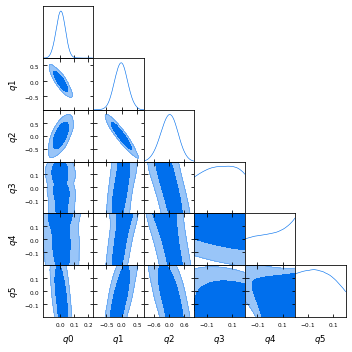

In [76]:
gdsamples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, model_keys, filled=True)

In [105]:
gdsamples.means

array([ 4.23233397e-03, -1.70677232e-02,  6.82348091e-03,  3.61084086e-03,
        1.72617207e-02, -1.30423024e-02, -2.71328780e+02, -2.71328780e+02])

In [78]:
poly_truth

Polynomial([-0.36648332,  0.59473091,  0.35250934,  0.        ,  0.        ,
       -0.02177809], domain=[-1,  1], window=[-1,  1])

In [89]:
n_samples = 200
sample_points = np.linspace(0,1,num=n_samples)
samples_truth = poly_truth(sample_points)
sample_noise = rng.normal(0, sample_std_dev, n_samples)
sample_observed = samples_truth+sample_noise

model_dim  =  pert_max
model_keys =  tuple('q'+str(i) for i in range(model_dim))
model_ranges = dict((k,{"min": -1, "max": 1}) for k in model_keys[:3])
model_ranges |= dict((k,{"min": -0.2, "max": 0.2}) for k in model_keys[3:])

exec("def get_polynomial_vals(" + ",".join(model_keys) + "): return np.polynomial.Polynomial(["+",".join(model_keys)+"])(sample_points)")

exec("def noisy_data_logp(" + ",".join(model_keys) + "): return stats.multivariate_normal.logpdf(get_polynomial_vals(" + ",".join(model_keys) + "), mean=sample_noise, cov=sample_std_dev)")

likelihood_info = {'noisy_data_like': noisy_data_logp}
params_info = {k: {"prior": model_ranges[k]} for k in model_keys}
sampler_info = {'mcmc':{'Rminus1_stop': 0.001,'max_tries': 1000}}
info = {'likelihood':likelihood_info,
        'params':params_info,
        'sampler':sampler_info,
        'max_tries': np.inf}
updated_info, sampler2 = run(info)

[noisy_data_like] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {noisy_data_like: 1020.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: q0:-0.05007973, q1:0.3326714, q2:-0.01551993, q3:-0.09090704, q4:-0.1840304, q5:0.1201956
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-01 00:43:18 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.021
[mcmc]  - Convergence of means: R-1 = 2.960434 after 192 accepted steps
[mcmc]  - Upd

[root] *WARNING* 2D kernel density bandwidth optimizer failed for q1, q3. Using fallback width: f(a) and f(b) must have different signs
[root] *WARNING* 2D kernel density bandwidth optimizer failed for q1, q4. Using fallback width: f(a) and f(b) must have different signs


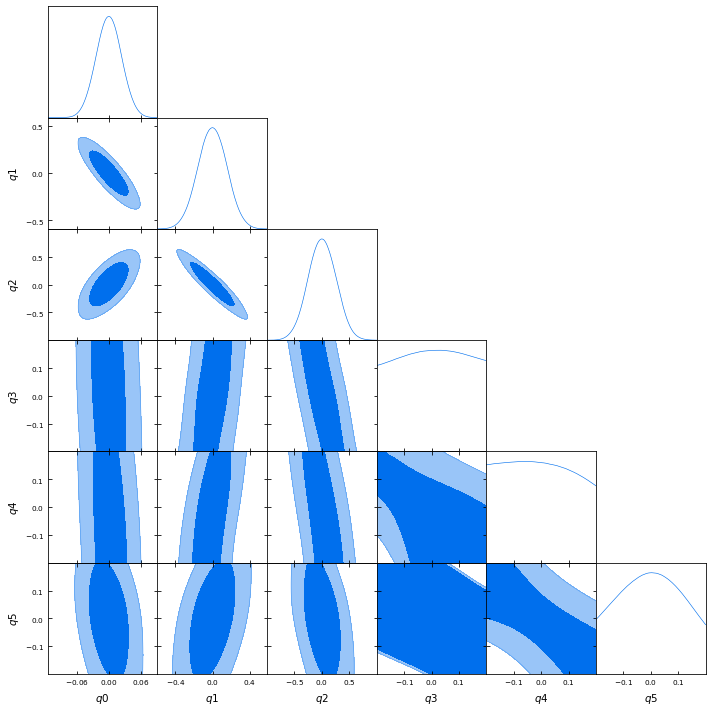

In [90]:
gdsamples2 = MCSamplesFromCobaya(updated_info, sampler2.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=10)
gdplot.triangle_plot(gdsamples2, model_keys, filled=True)

In [87]:
coefs_truth

array([-0.36648332,  0.59473091,  0.35250934,  0.        ,  0.        ,
       -0.02177809])

In [93]:
gd.means

array([-3.28491811e-04, -1.08967970e-03,  4.39804087e-03,  1.91115512e-03,
       -6.42908382e-03, -8.43508755e-04, -5.48061809e+02, -5.48061809e+02])